<a href="https://colab.research.google.com/github/CallMeEllijah/AsyncExercise-Healthsite/blob/main/AsyncExerciseHealthsite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

In [60]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
ph = gpd.read_file("gadm36_PHL_1.shp")

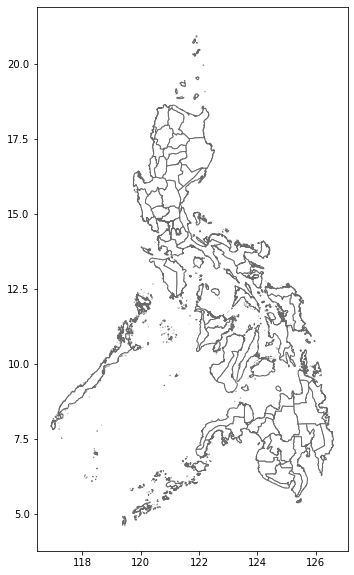

In [62]:
ax = ph.plot(figsize=(20,10), color="w", edgecolor="dimgray")

In [63]:
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')

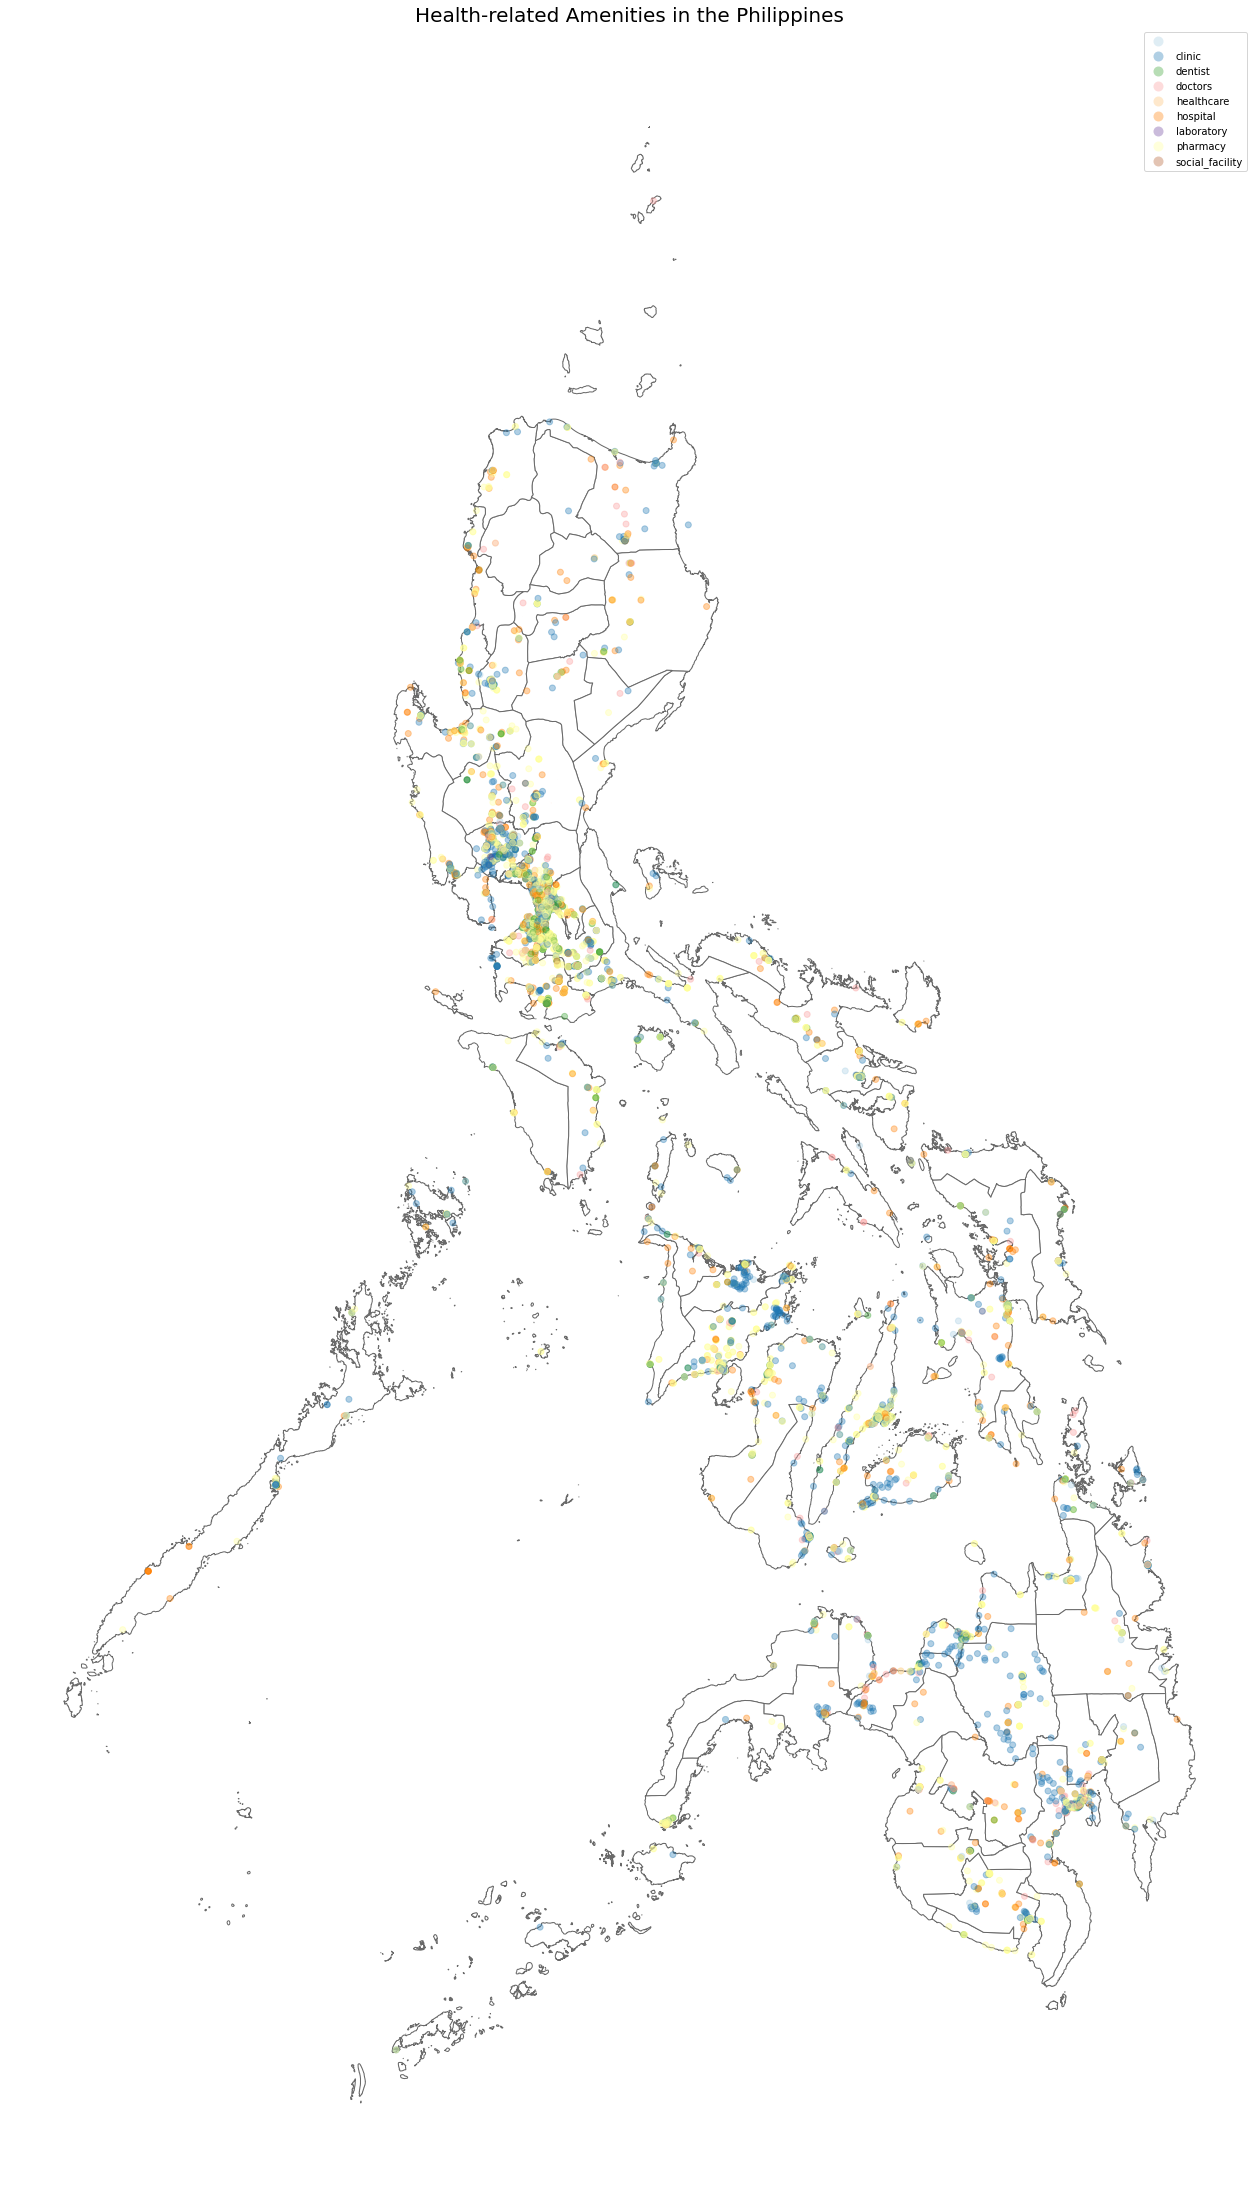

In [64]:
fig = plt.figure(figsize=(50, 40))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenitiesthe Philippines', fontsize=20)
ax.axis('off');

In [58]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm_healthsites = gpd.sjoin(healthsites, mm, how='inner', op='within')
mm_healthsites.amenity.unique()

array(['pharmacy', 'doctors', 'dentist', 'clinic', '', 'hospital',
       'healthcare'], dtype=object)

In [57]:

cv = ph[ph.NAME_1=="Cavite"]
cv_healthsites = gpd.sjoin(healthsites, cv, how='inner', op='within')
cv_healthsites.amenity.unique()

array(['pharmacy', 'clinic', 'dentist', 'hospital', '', 'doctors'],
      dtype=object)

(0.0, 1.0, 0.0, 1.0)

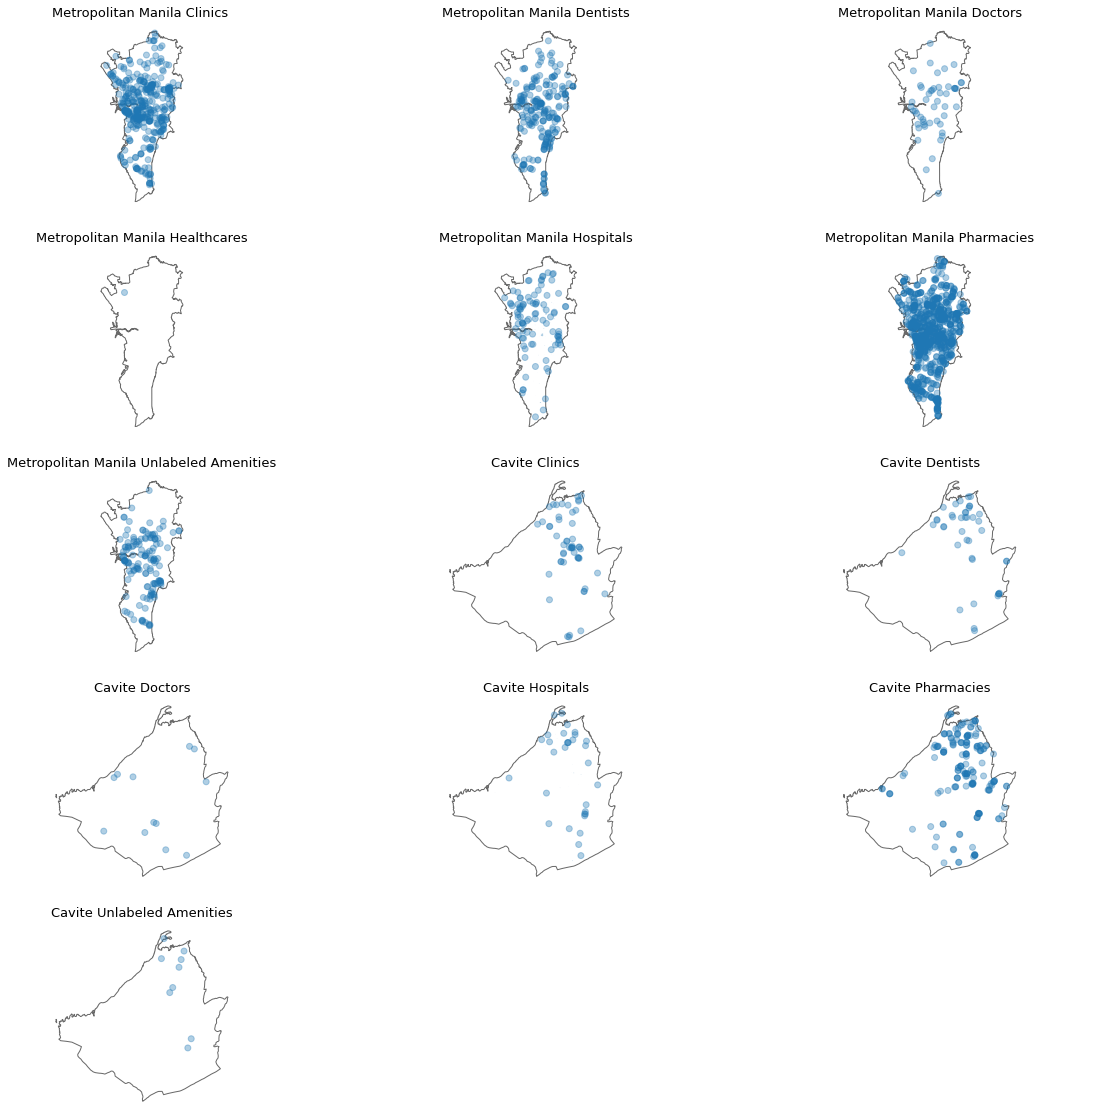

In [65]:
mm_clinic     = mm_healhtsites[mm_healhtsites.amenity=='clinic']
mm_dentist    = mm_healhtsites[mm_healhtsites.amenity=='dentist']
mm_doctors    = mm_healhtsites[mm_healhtsites.amenity=='doctors']
mm_healthcare = mm_healhtsites[mm_healhtsites.amenity=='healthcare']
mm_hospital   = mm_healhtsites[mm_healhtsites.amenity=='hospital']
mm_pharmacy   = mm_healhtsites[mm_healhtsites.amenity=='pharmacy']
mm_unlabeled  = mm_healhtsites[mm_healhtsites.amenity=='']

cv_clinic     = cv_healthsites[cv_healthsites.amenity=='clinic']
cv_dentist    = cv_healthsites[cv_healthsites.amenity=='dentist']
cv_doctors    = cv_healthsites[cv_healthsites.amenity=='doctors']
cv_healthcare = cv_healthsites[cv_healthsites.amenity=='healthcare']
cv_hospital   = cv_healthsites[cv_healthsites.amenity=='hospital']
cv_pharmacy   = cv_healthsites[cv_healthsites.amenity=='pharmacy']
cv_unlabeled = cv_healthsites[cv_healthsites.amenity=='']

fig, axs = plt.subplots(5, 3, figsize=(20,20))

mm.plot(ax=axs[0, 0], color='white', edgecolor='dimgray')
mm_clinic.plot(ax=axs[0, 0], column='amenity', alpha=0.35)
axs[0, 0].set_title('Metropolitan Manila Clinics ', fontsize=13)
axs[0, 0].axis('off')

mm.plot(ax=axs[0, 1], color='white', edgecolor='dimgray')
mm_dentist.plot(ax=axs[0, 1], column='amenity', alpha=0.35)
axs[0, 1].set_title('Metropolitan Manila Dentists', fontsize=13)
axs[0, 1].axis('off')

mm.plot(ax=axs[0, 2], color='white', edgecolor='dimgray')
mm_doctors.plot(ax=axs[0, 2], column='amenity', alpha=0.35)
axs[0, 2].set_title('Metropolitan Manila Doctors', fontsize=13)
axs[0, 2].axis('off')

mm.plot(ax=axs[1, 0], color='white', edgecolor='dimgray')
mm_healthcare.plot(ax=axs[1, 0], column='amenity', alpha=0.35)
axs[1, 0].set_title('Metropolitan Manila Healthcares', fontsize=13)
axs[1, 0].axis('off')

mm.plot(ax=axs[1, 1], color='white', edgecolor='dimgray')
mm_hospital.plot(ax=axs[1, 1], column='amenity', alpha=0.35)
axs[1, 1].set_title('Metropolitan Manila Hospitals', fontsize=13)
axs[1, 1].axis('off')

mm.plot(ax=axs[1, 2], color='white', edgecolor='dimgray')
mm_pharmacy.plot(ax=axs[1, 2], column='amenity', alpha=0.35)
axs[1, 2].set_title('Metropolitan Manila Pharmacies', fontsize=13)
axs[1, 2].axis('off')

mm.plot(ax=axs[2, 0], color='white', edgecolor='dimgray')
mm_unlabeled.plot(ax=axs[2, 0], column='amenity', alpha=0.35)
axs[2, 0].set_title('Metropolitan Manila Unlabeled Amenities', fontsize=13)
axs[2, 0].axis('off')



cv.plot(ax=axs[2, 1], color='white', edgecolor='dimgray')
cv_clinic.plot(ax=axs[2, 1], column='amenity', alpha=0.35)
axs[2, 1].set_title('Cavite Clinics', fontsize=13)
axs[2, 1].axis('off')

cv.plot(ax=axs[2, 2], color='white', edgecolor='dimgray')
cv_dentist.plot(ax=axs[2, 2], column='amenity', alpha=0.35)
axs[2, 2].set_title('Cavite Dentists', fontsize=13)
axs[2, 2].axis('off')

cv.plot(ax=axs[3, 0], color='white', edgecolor='dimgray')
cv_doctors.plot(ax=axs[3, 0], column='amenity', alpha=0.35)
axs[3, 0].set_title('Cavite Doctors', fontsize=13)
axs[3, 0].axis('off')

cv.plot(ax=axs[3, 1], color='white', edgecolor='dimgray')
cv_hospital.plot(ax=axs[3, 1], column='amenity', alpha=0.35)
axs[3, 1].set_title('Cavite Hospitals', fontsize=13)
axs[3, 1].axis('off')

cv.plot(ax=axs[3, 2], color='white', edgecolor='dimgray')
cv_pharmacy.plot(ax=axs[3, 2], column='amenity', alpha=0.35)
axs[3, 2].set_title('Cavite Pharmacies', fontsize=13)
axs[3, 2].axis('off')

cv.plot(ax=axs[4, 0], color='white', edgecolor='dimgray')
cv_unlabeled.plot(ax=axs[4, 0], column='amenity', alpha=0.35)
axs[4, 0].set_title('Cavite Unlabeled Amenities', fontsize=13)
axs[4, 0].axis('off')

axs[4, 1].axis('off')
axs[4, 2].axis('off')